# TP 1 - Séance II
## Analyse de signaux 1D

In [2]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice IV (7 points)
## FFT d'un signal théorique

Soient les trois signaux suivant:
$$Y_1(t)=7\cos(2\pi\times6t)$$
$$Y_2(t)=4\cos(2\pi\times15t + \frac{3\pi}{2})$$
$$Y_3(t)=-3\cos(2\pi\times30t)$$

**1.** Donnez l'amplitude, la fréquence et la phase de chacun de ces signaux.

Y1(t) :
Fréquence = 6 Hz
Amplitude = 7
Phase = 0 

Y2(t) :
Fréquence = 15 Hz
Amplitude = 4
Phase = 3pi/2 rad

Y3(t) :
Fréquence = 30 Hz
Amplitude = -3
Phase = 0

Ces signaux sont échantillonés à la fréquence $F_e = 120 \text{ Hz}$ pour $0 \leq t \leq 1$.

**2.** Affichez les trois signaux superposés sur un même graphe.

Text(0, 0.5, 'Amplitude')

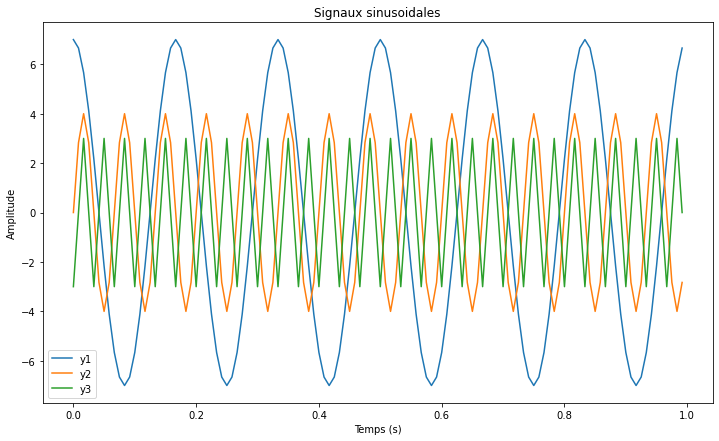

In [14]:
# Attention! np.linspace(0, 1, Fe) ne donne pas une fréquence d'échantillonage de 1/Fe mais de 1/(Fe-1).
# Utilisez plutôt np.arange.
t = np.arange(0, 1, 1/120)

y1 = 7*np.cos(2*np.pi*6*t)
y2 = 4*np.cos(2*np.pi*15*t + 3*np.pi/2)
y3 = -3*np.cos(2*np.pi*30*t)

fig, ax = plt.subplots()
ax.plot(t, y1)
ax.plot(t, y2)
ax.plot(t, y3)

ax.legend(['y1', 'y2', 'y3'])
ax.set_title('Signaux sinusoidales')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Amplitude')





**3.** Affichez la somme des signaux $S(t)=Y_1(t)+Y_2(t)+Y_3(t)$. Déterminez graphiquement la période du signal S.

12.663118960624637


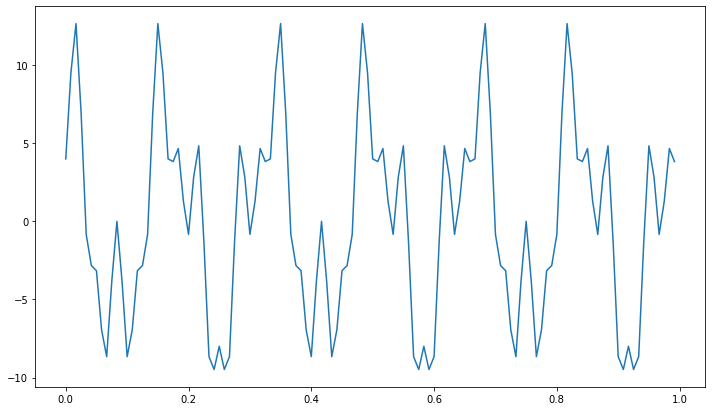

In [20]:
somme = y1 + y2 + y3
fig, ax = plt.subplots()
ax.plot(t, somme)

max = np.amax(somme)
print(max)
# grid
# ou find_peaks scipy

###### PAS FINI

**4.** Affichez le module et la phase de la FFT des signaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$ entre 0 et 60Hz.
Vérifiez que l'amplitude, la fréquence et la phase des signaux correspondent bien aux valeurs attendues.

(Vous pouvez encapsuler le code de calcul et d'affichage de la fft dans une fonction.)

120


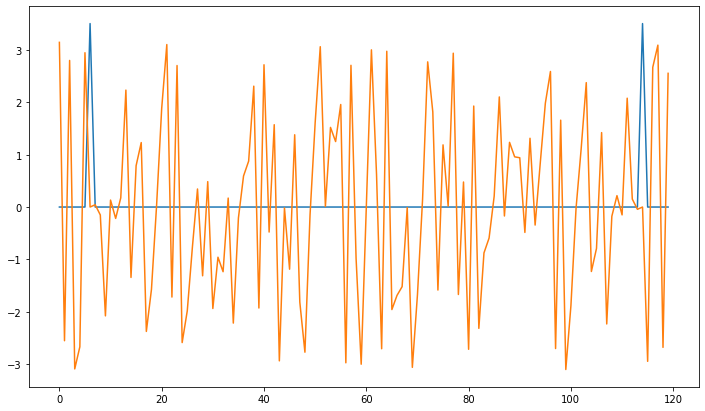

In [35]:
# La fft se calcule avec:  y = fft(Y) / len(Y). 
# Les raies calculées correspondent aux fréquences comprises entre 0 (incluse) et Fe (exclue) avec un pas de Fe/len(Y).
# Leur module est donné par: np.abs(y) et leur phase (en radians) par: np.angle(y)
Fe = 120 #Hz
freq = np.arange(0, Fe, Fe/len(y1))

fft1 = np.fft.fft(y1)/len(y1)  # pk divise par len(y1) ??
amplitude1 = np.abs(fft1)
phase1 = np.angle(fft1)

#np.fft.fft()

print(len(y1))
plt.plot(freq, amplitude1)
plt.plot(freq, phase1)

# https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
# https://www.gaussianwaves.com/2020/01/how-to-plot-fft-in-python-fft-of-basic-signals-sine-and-cosine-waves/
# https://stackoverflow.com/questions/28618591/numpy-fft-what-is-the-return-value-amplitude-phase-shift-or-angle
# https://dsp.stackexchange.com/questions/72005/calculate-the-magnitude-and-phase-of-a-signal-at-a-particular-frequency-in-pytho
# https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python

# Seulement prendre fenêtre de 0 à 60 Hz
# Flip (coller ensemble) p/r au milieu


**5.** De la même manière affichez le spectre de $S$. Quelle propriété de la transformée de Fourier est mise en évidence par cette expérience?

**6.** Pourquoi est-ce pertinent de tracer le spectre entre 0 et 60Hz plutôt qu'entre 0 et 120Hz?

**7.** Si on retardait $Y_1(t)$ d'un quart de seconde de sorte que $Y_1'(t)=Y_1(t+\frac{1}{4})$, comment évoluerait le module du spectre? Même question pour sa phase (à la fréquence du signal)?

On échantillone maintenant ces signaux avec une fréquence d'échantillonage $F_{e2}=40$ Hz.

**8.** Tracez à nouveau $S$ en temporel en le superposant au signal échantilloné à 120Hz affiché en pointillé.

Tracez le module du nouveau spectre de S entre 0 et $F_{e2}=40$ Hz.

**9.** En étudiant le nouveau spectre, lequel des 3 signaux a été altéré par le sous-échantillonage? Pourquoi?

**10.** Quelle est la fréquence d'échantillonage minimale pour assurer une bonne mesure de ces signaux?